In [76]:
%matplotlib inline
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')


sns.set_style('whitegrid')
sns.set_theme(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [77]:
df = pd.read_csv('../Data/Raw/movies_metadata.csv')
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


# Описание признаков
###    adult: Indicates if the movie is X-Rated or Adult.
###    belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
###    budget: The budget of the movie in dollars.
###    genres: A stringified list of dictionaries that list out all the genres associated with the movie.
###    homepage: The Official Homepage of the move.
###    id: The ID of the move.
###    imdb_id: The IMDB ID of the movie.
###    original_language: The language in which the movie was originally shot in.
###    original_title: The original title of the movie.
###    overview: A brief blurb of the movie.
###    popularity: The Popularity Score assigned by TMDB.
###    poster_path: The URL of the poster image.
###    production_companies: A stringified list of production companies involved with the making of the movie.
###    production_countries: A stringified list of countries where the movie was shot/produced in.
###    release_date: Theatrical Release Date of the movie.
###    revenue: The total revenue of the movie in dollars.
###    runtime: The runtime of the movie in minutes.
###    spoken_languages: A stringified list of spoken languages in the film.
###    status: The status of the movie (Released, To Be Released, Announced, etc.)
###    tagline: The tagline of the movie.
###    title: The Official Title of the movie.
###    video: Indicates if there is a video present of the movie with TMDB.
###    vote_average: The average rating of the movie.
###    vote_count: The number of votes by users, as counted by TMDB.

In [78]:
df.shape

(45466, 24)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# В Датасете 45466 фильмов и 24 признака

In [80]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan


df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

df['revenue'] = df['revenue'].replace(0, np.nan)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)

df['return'] = df['revenue'] / df['budget']

# Выведем облако тегов для названия и описания фильмов
# Чаще всего в описании фильмов содержатся слова life, love, find, one
# Чаще всего в названии фильмов содержатся слова Love или Man

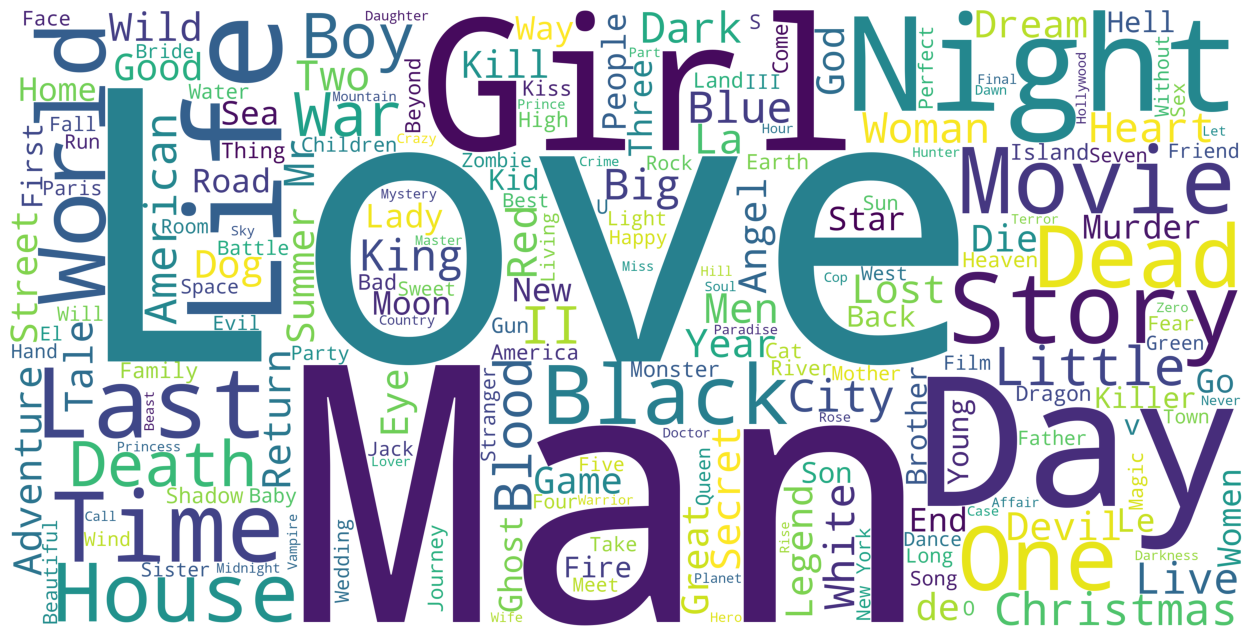

In [81]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

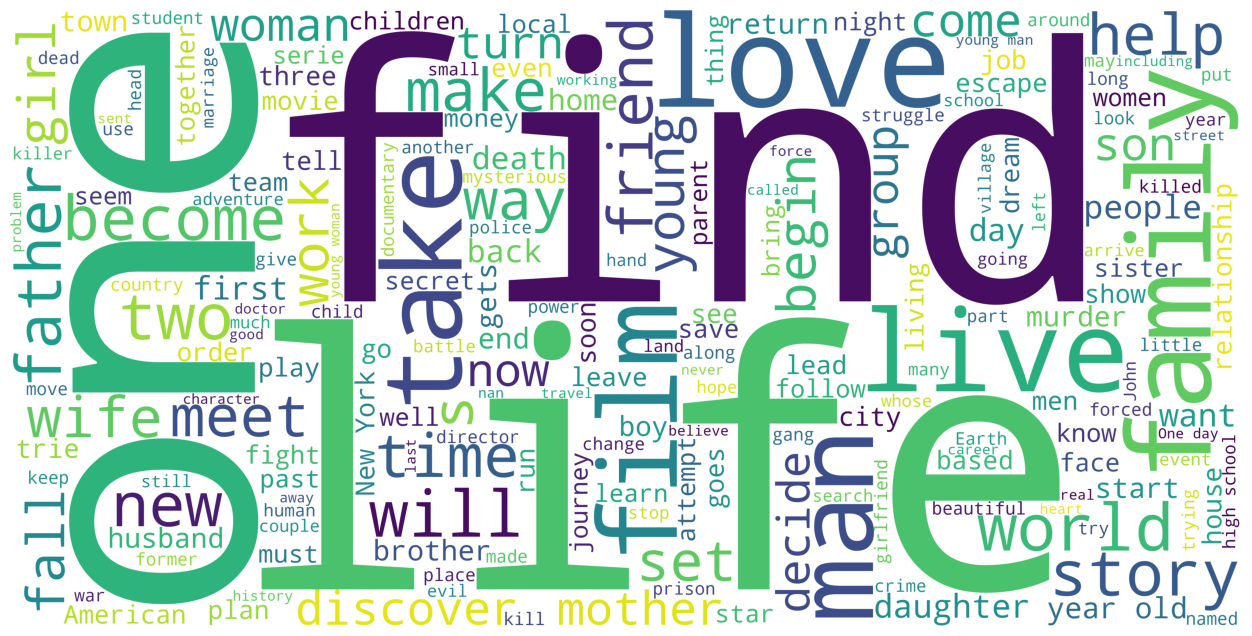

In [82]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

# США - страна с самым большим количеством фильмов 21153

In [83]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']

con_df.head(10)

,num_movies,country
countries,,
United States of America,21153,United States of America
United Kingdom,4094,United Kingdom
France,3940,France
Germany,2254,Germany
Italy,2169,Italy
Canada,1765,Canada
Japan,1648,Japan
Spain,964,Spain
Russia,912,Russia


# Для наглядности, выведем карту стран без США

In [84]:
import plotly.graph_objects as go

# Данные остаются прежними
con_df = con_df[con_df['country'] != 'United States of America']

# Создание карты Choropleth
fig = go.Figure(data=go.Choropleth(
    locations=con_df['country'],
    locationmode='country names',
    z=con_df['num_movies'],
    text=con_df['country'],
    colorscale='Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Количество фильмов',
))

fig.update_layout(
    title_text='Производство фильмов вне США',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='robinson',
    ),
    margin={"r":0,"t":30,"l":0,"b":0},
)

fig.show()

# Самая прибыльная франшиза (по общему заработку) - Гарри Поттер
# Самая прибыльная франшиза (по среднему заработку за фильм) - Аватар
# Самая большая франшиза (по количеству фильмов) - Джеймс Бонд


In [85]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


In [86]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


In [87]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
540,Halloween Collection,8,3.089601e+07,2.471681e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1043,Rocky Collection,7,1.910180e+08,1.337126e+09


# Самая прибыльная кинокомпания (по общему заработку) - Warner Bros.
# Самая прибыльная кинокомпания (по среднему заработку за фильм) - Pixar Animation


In [88]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'
com_df = df.drop('production_companies', axis=1).join(s)
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']
com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78


In [89]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19


# В датасете собраны фильмы на 93-ёх языках
# Самый популярный - Английский, 93269 фильма

In [90]:
df['original_language'].drop_duplicates().shape[0]

93

In [91]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
original_language,,
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


# Общий график

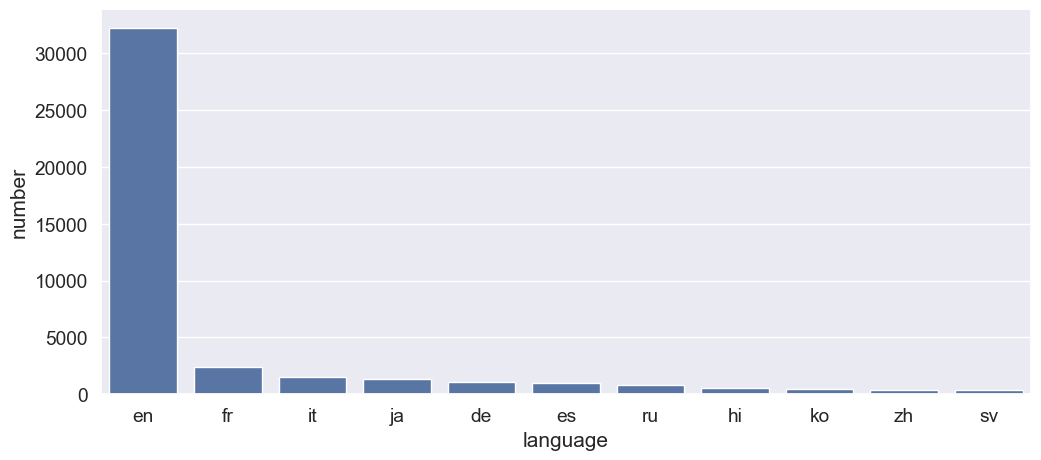

In [92]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[0:11])
plt.show()

# График без самого популярного языка

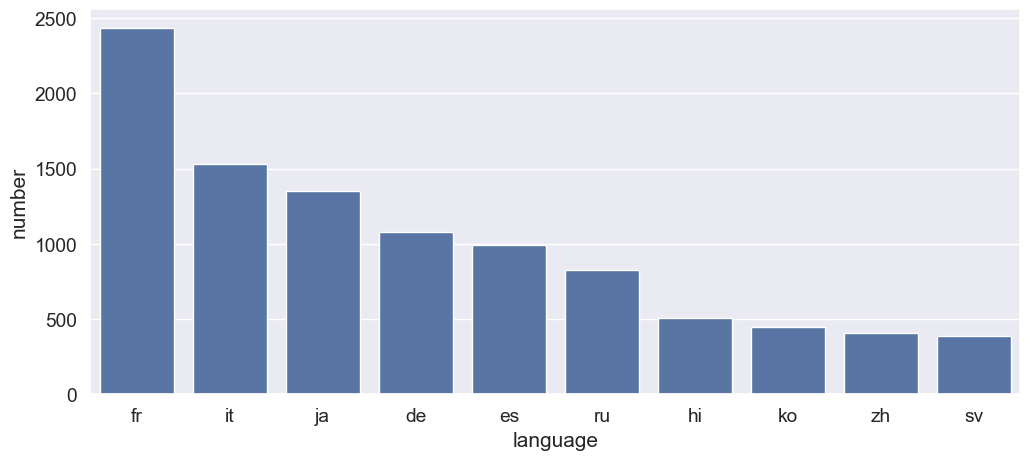

In [93]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

# Рассмотрим фильмы по популярности (это внутрення оценка от сервиса TMDB):

# В среднем популярности фильма = 3
# Самый популярный фильм - Миньоны, с рейтингом 547

In [94]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

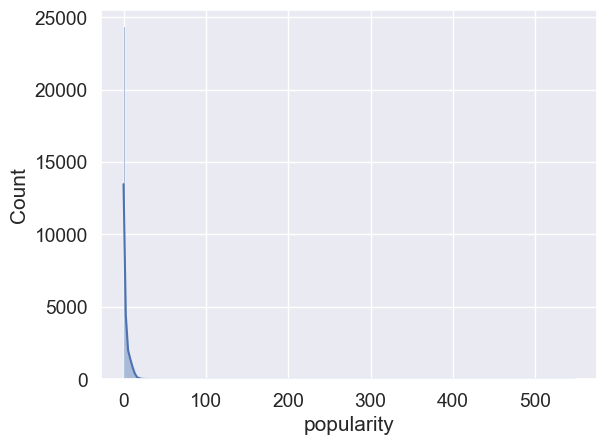

In [95]:
sns.histplot(df['popularity'].fillna(df['popularity'].median()), kde=True)
plt.show()

<Axes: ylabel='Frequency'>

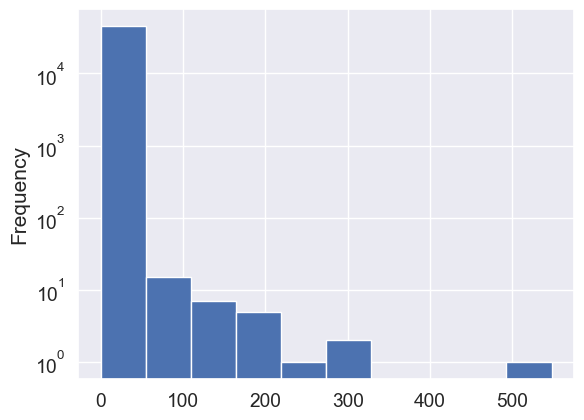

In [96]:
df['popularity'].plot(logy=True, kind='hist')

In [97]:
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


# Рассмотрим фильмы по количеству оценок:

# В среднем количество оценок у фильма = 110
# Фильм с наибольшим количеством оценок - Inception (Начало), 14075 оценок

# Средняя оценка фильма = 6.0
# Наибольшая = 10

# Отфильтруем фильмы по количеству оценок > 2000, фильмами с наибольшими оценками будут - Крёстный Отец и Побег из Шоушенка с рейтингом 8.5

In [98]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [99]:
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


In [100]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

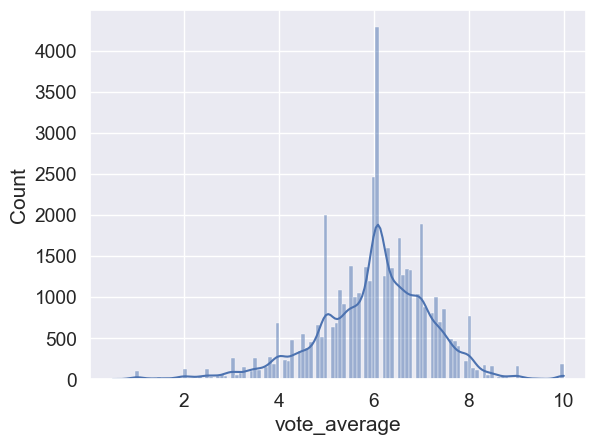

In [101]:
sns.histplot(df['vote_average'].fillna(df['vote_average'].median()), kde=True)
plt.show()

In [102]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count
834,The Godfather,8.5,6024.0
314,The Shawshank Redemption,8.5,8358.0
23673,Whiplash,8.3,4376.0
522,Schindler's List,8.3,4436.0
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0
292,Pulp Fiction,8.3,8670.0
5481,Spirited Away,8.3,3968.0
12481,The Dark Knight,8.3,12269.0
2211,Life Is Beautiful,8.3,3643.0
1178,The Godfather: Part II,8.3,3418.0


# Больше всего фильмов выходит в Январе - связано с высоким спросом на развлечения, чаще всего выходят не самые интересные фильмы
# Самый прибыльный месяц - Май - подростки и студенты уходят на летний отдых, выходят крупные блокбастеры которые приносят много прибыли
#

<Axes: title={'center': 'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

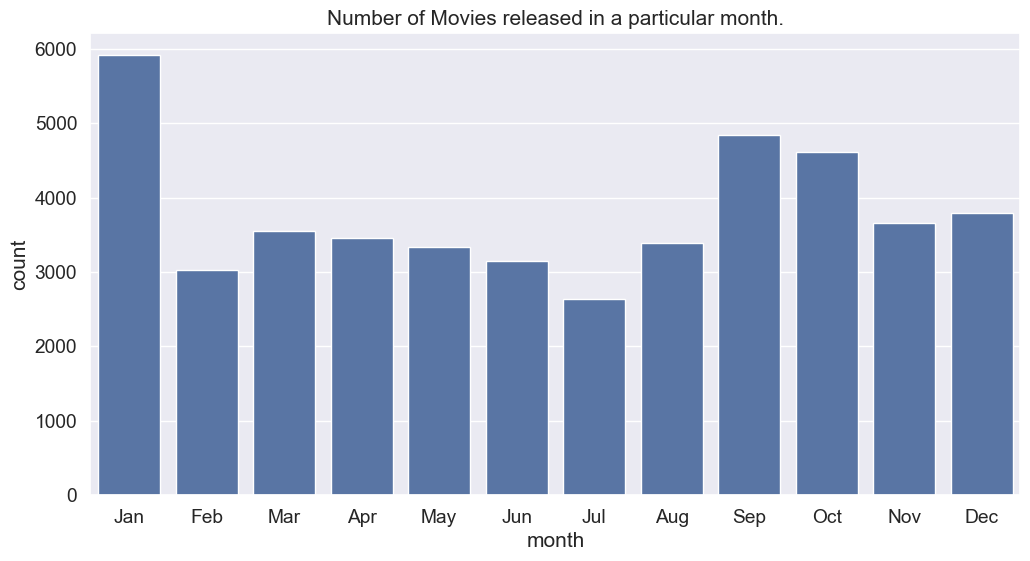

In [103]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

<Axes: title={'center': 'Average Gross by the Month for Blockbuster Movies'}, xlabel='mon', ylabel='revenue'>

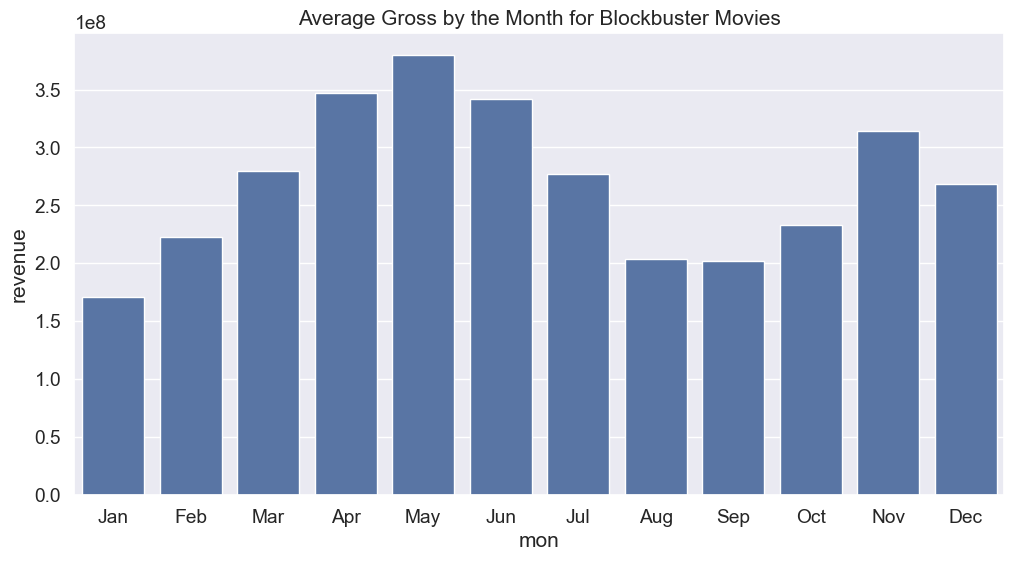

In [104]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

<Axes: title={'center': 'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

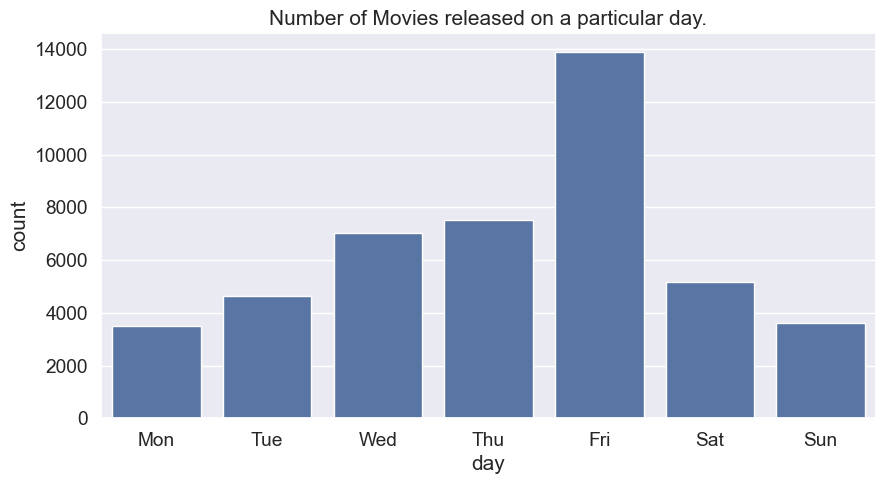

In [105]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

<Axes: xlabel='year'>

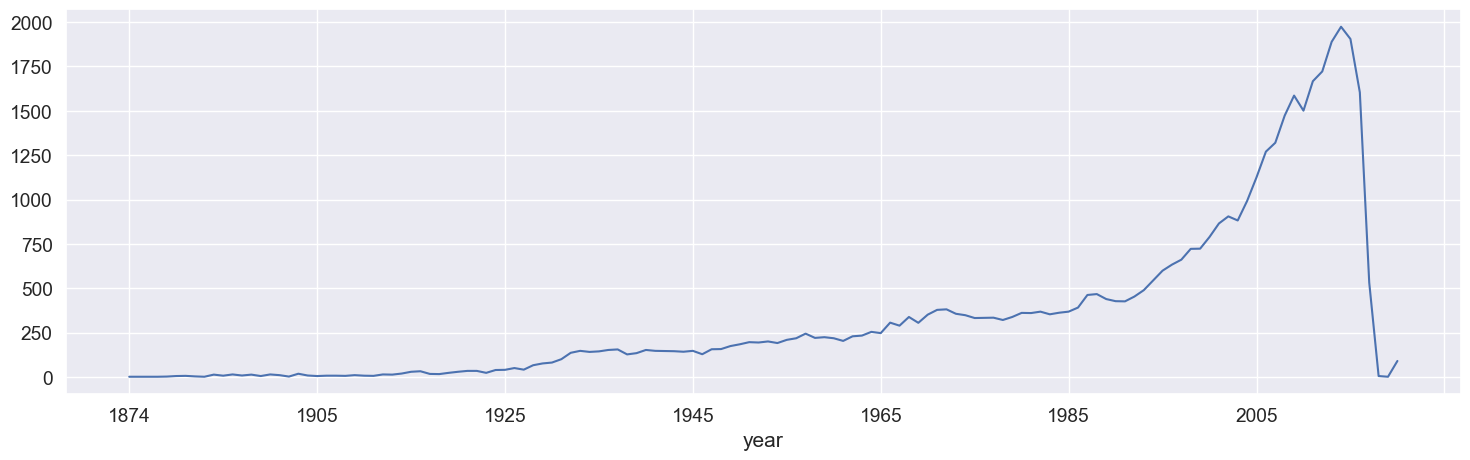

In [106]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

In [107]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

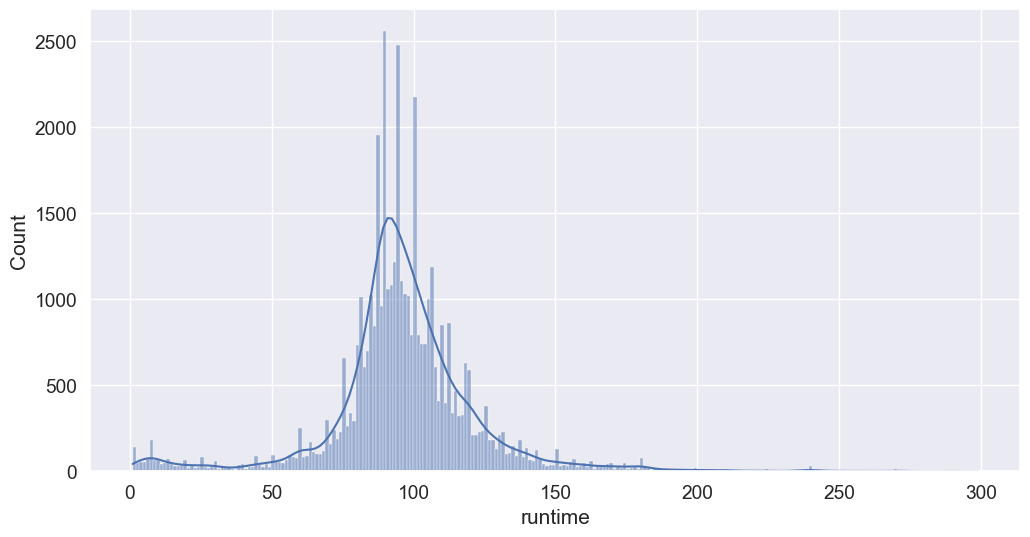

In [108]:
df['runtime'] = df['runtime'].astype('float')
plt.figure(figsize=(12,6))
sns.histplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'], kde=True)
plt.show()

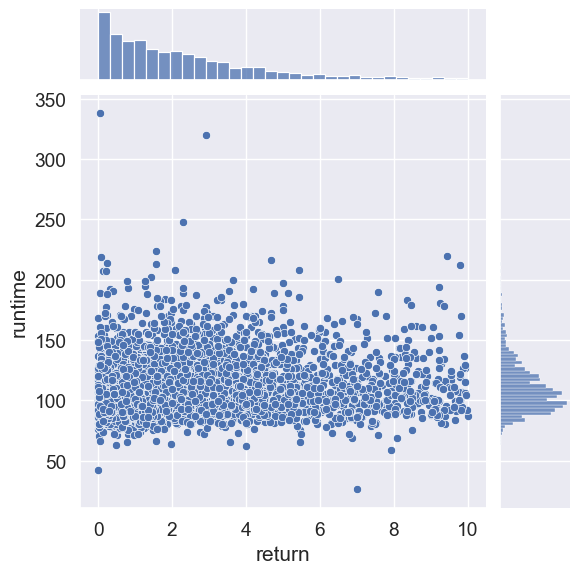

In [109]:
df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot(x='return', y='runtime', data=df_mat)
plt.show()

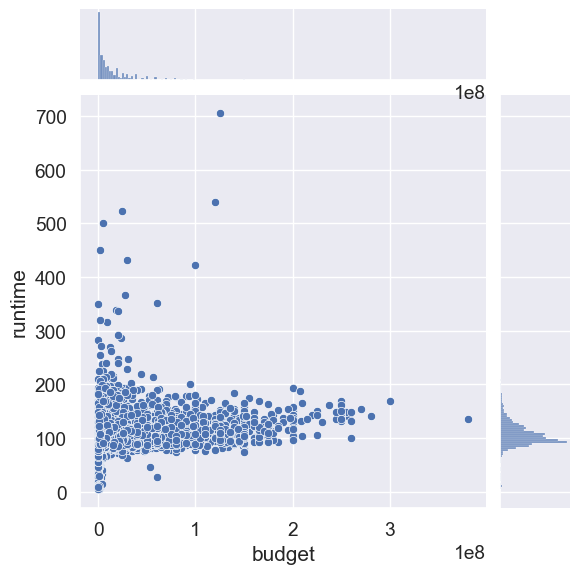

In [110]:
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot(x='budget', y='runtime', data=df_mat)
plt.show()

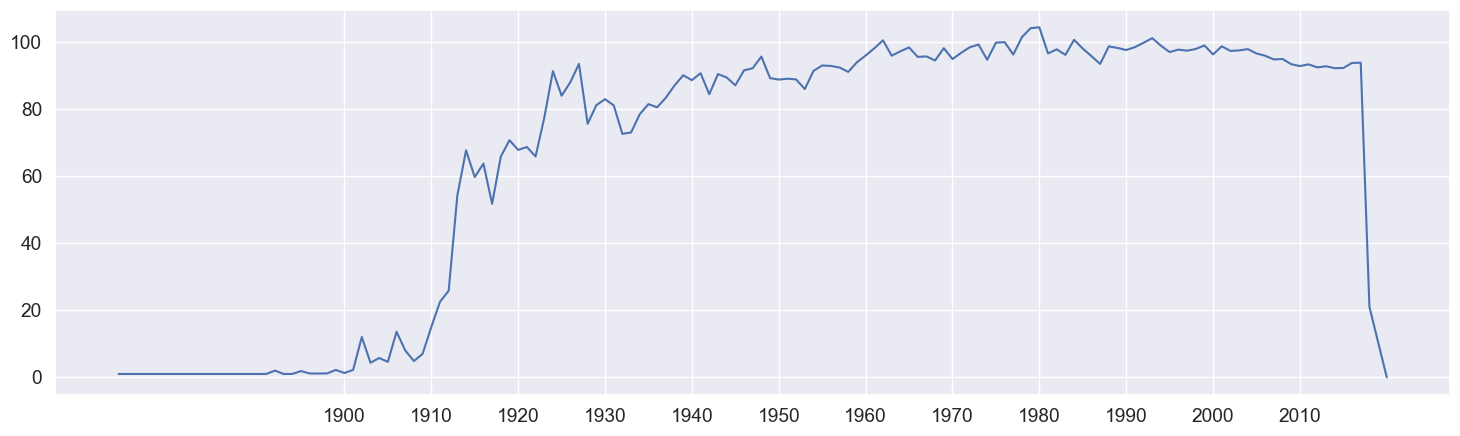

In [111]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
valid_years_df = df.dropna(subset=['year'])
valid_years_df['year'] = valid_years_df['year'].astype(int)
year_runtime = valid_years_df.groupby('year')['runtime'].mean()

plt.figure(figsize=(18,5))
plt.plot(year_runtime.index, year_runtime.values)
plt.xticks(np.arange(1900, 2020, 10))
plt.show()

In [112]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
45450,1.0,The One-Man Band,1900.0
19012,1.0,Dickson Experimental Sound Film,1894.0
41308,1.0,Tetra Vaal,2004.0
25213,1.0,The Kiss,1900.0
44669,1.0,"Divers at Work on the Wreck of the ""Maine""",1898.0
44672,1.0,Panorama pris d'un train en marche,1898.0
44647,1.0,A Nightmare,1896.0
44646,1.0,The Vanishing Lady,1896.0
44703,1.0,Why Jones Discharged His Clerks,1900.0
44702,1.0,"Bird's-Eye View of Dock Front, Galveston",1900.0


In [113]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [114]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011.0
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007.0
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015.0
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006.0
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012.0
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017.0
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010.0
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007.0
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013.0
16128,Harry Potter and the Deathly Hallows: Part 1,250000000.0,9.543059e+08,3.817223,2010.0


In [115]:
gross_top = df[['title', 'budget', 'revenue', 'return', 'year']].sort_values('revenue', ascending=False).head(10)
gross_top

,title,budget,revenue,return,year
14551,Avatar,237000000.0,2.787965e+09,11.763566,2009.0
26555,Star Wars: The Force Awakens,245000000.0,2.068224e+09,8.441729,2015.0
1639,Titanic,200000000.0,1.845034e+09,9.225171,1997.0
17818,The Avengers,220000000.0,1.519558e+09,6.907081,2012.0
25084,Jurassic World,150000000.0,1.513529e+09,10.090192,2015.0
28830,Furious 7,190000000.0,1.506249e+09,7.927628,2015.0
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015.0
17437,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,10.736000,2011.0
22110,Frozen,150000000.0,1.274219e+09,8.494793,2013.0
42222,Beauty and the Beast,160000000.0,1.262886e+09,7.893040,2017.0


In [116]:
df[(df['return'].notnull()) & (df['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982.0
256,Star Wars,11000000.0,775398007.0,70.490728,1977.0
1338,Jaws,7000000.0,470654000.0,67.236286,1975.0
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973.0
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994.0
834,The Godfather,6000000.0,245066411.0,40.844402,1972.0
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989.0
24258,Annabelle,6500000.0,255273813.0,39.272894,2014.0
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987.0
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965.0


In [117]:
df[(df['return'].notnull()) & (df['budget'] > 5e6) & (df['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005.0
19027,5 Days of War,20000000.0,17479.0,0.000874,2011.0
21034,Special Forces,10000000.0,10759.0,0.001076,2011.0
25732,Foodfight!,65000000.0,73706.0,0.001134,2012.0
38388,Term Life,16500000.0,21256.0,0.001288,2016.0
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012.0
12038,The Good Night,15000000.0,20380.0,0.001359,2007.0
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987.0
22097,Twice Born,13000000.0,18295.0,0.001407,2012.0
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001.0


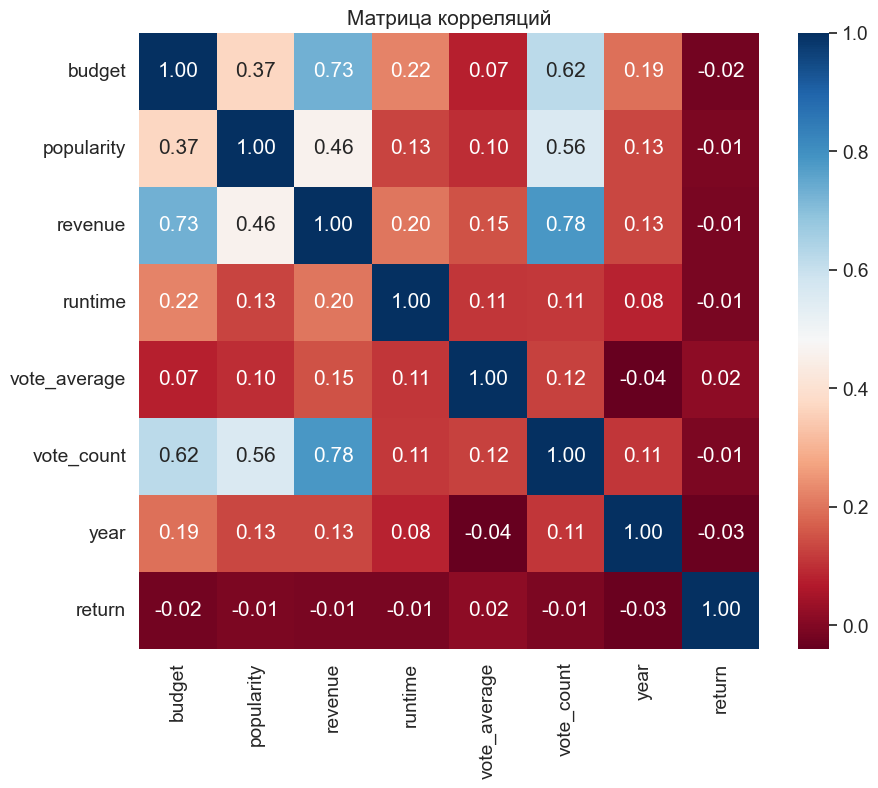

In [118]:
num_df = df.select_dtypes(include=["number"])

corrmatrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corrmatrix, annot=True, fmt=".2f", cmap="RdBu")
plt.title("Матрица корреляций")
plt.show()

In [119]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_df = df.drop('genres', axis=1).join(s)
gen_df['genre'].value_counts().shape[0]

32

In [120]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


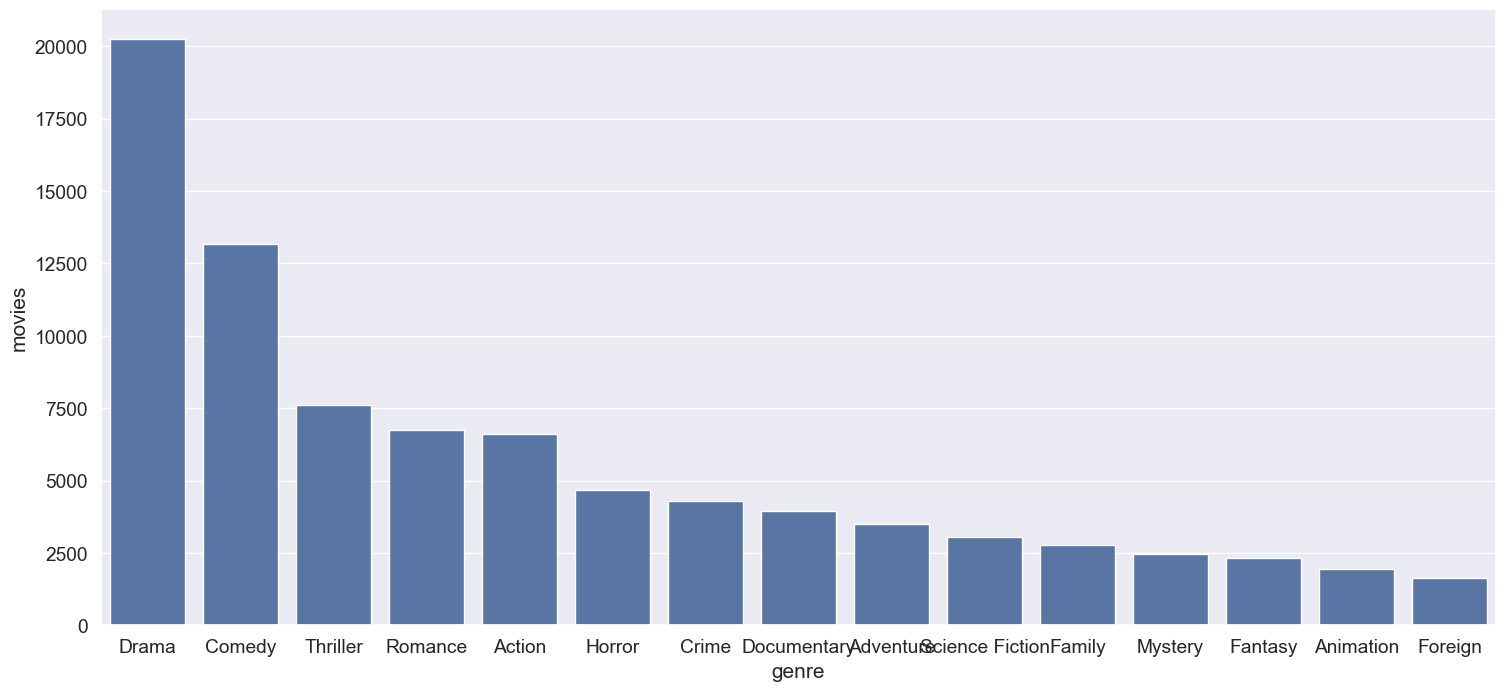

In [121]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

In [122]:
credits_df = pd.read_csv('../Data/Raw/credits.csv')
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan


df['id'] = df['id'].apply(convert_int)
df = df.drop([19730, 29503, 35587])
df['id'] = df['id'].astype('int')
df = df.merge(credits_df, on='id')


In [123]:
df['cast']

0        [{'cast_id': 14, 'character': 'Woody (voice)',...
1        [{'cast_id': 1, 'character': 'Alan Parrish', '...
2        [{'cast_id': 2, 'character': 'Max Goldman', 'c...
3        [{'cast_id': 1, 'character': "Savannah 'Vannah...
4        [{'cast_id': 1, 'character': 'George Banks', '...
                               ...                        
45533    [{'cast_id': 0, 'character': '', 'credit_id': ...
45534    [{'cast_id': 1002, 'character': 'Sister Angela...
45535    [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...
45536    [{'cast_id': 2, 'character': '', 'credit_id': ...
45537                                                   []
Name: cast, Length: 45538, dtype: object

In [124]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

def check(x):
    if isinstance(x, list):
        return ast.literal_eval(x)
    else:
        print(x)
        print(type(x))
        return 0

df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['director'] = df['crew'].apply(get_director)
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)

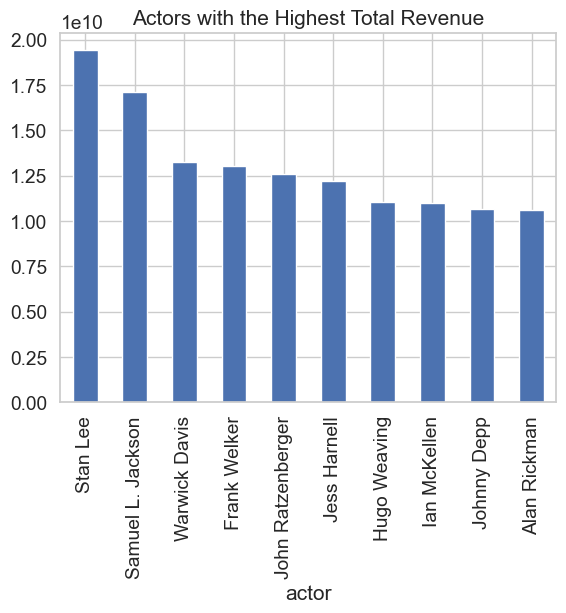

In [125]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

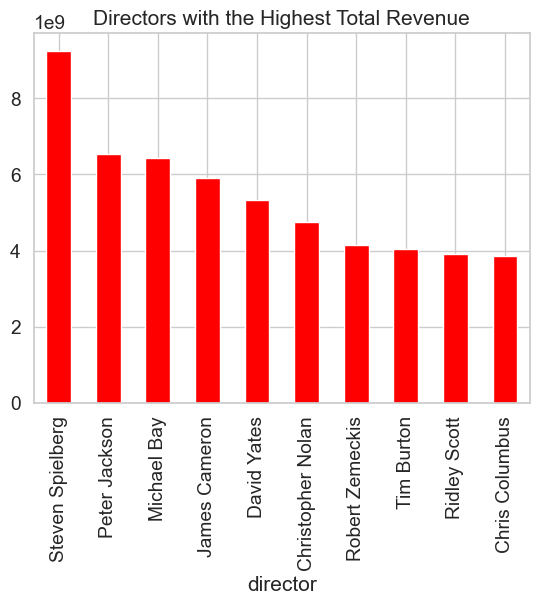

In [126]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

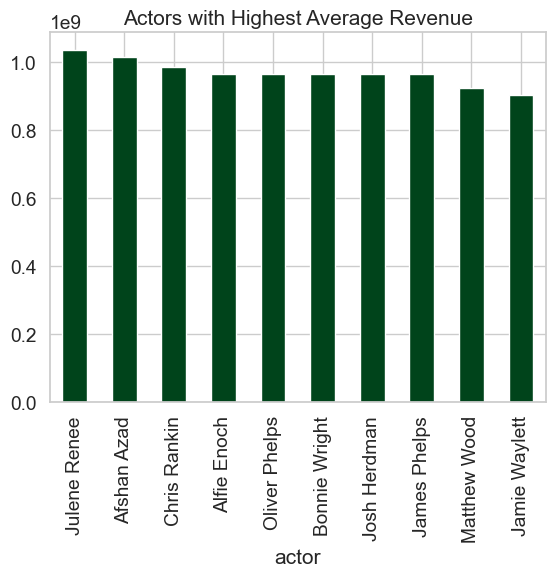

In [127]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

plt.title("Actors with Highest Average Revenue")
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='Greens_r')
plt.show()

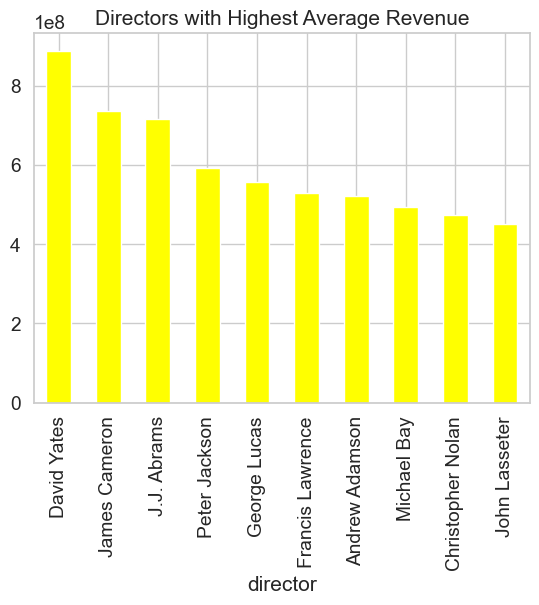

In [128]:
plt.title("Directors with Highest Average Revenue")
df[df['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()

In [129]:
success_df = cast_df[(cast_df['return'].notnull()) & (cast_df['revenue'] > 1e7) & (cast_df['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

,return
actor,
Jami Gertz,3.099099e+06
Donna Mitchell,2.479289e+06
Andrew McCarthy,2.479280e+06
Nicholas Pryor,1.770914e+06
James Spader,1.549551e+06
Michael Bowen,1.033038e+06
Robert Downey Jr.,5.165189e+05
Martin Kove,3.395458e+05
William Zabka,3.395441e+05


In [130]:
success_df = df[(df['return'].notnull()) & (df['revenue'] > 1e7) & (df['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

,return
director,
John G. Avildsen,169822.750468
George A. Romero,60.656935
George Lucas,54.328446
Martha Coolidge,49.553131
Davis Guggenheim,46.243000
George Miller,39.076975
James Wan,27.659835
Guy Hamilton,25.779057
John Badham,25.433532


In [131]:
df[(df['director'] == 'John G. Avildsen') & (df['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]

,title,budget,revenue,return,year
1849,Rocky,1000000.0,117235147.0,1.172351e+02,1976.0
2303,Rocky V,42000000.0,119946358.0,2.855866e+00,1990.0
2311,The Karate Kid,8000000.0,90815558.0,1.135194e+01,1984.0
2312,"The Karate Kid, Part II",113.0,115103979.0,1.018619e+06,1986.0
5214,Joe,106000.0,19319254.0,1.822571e+02,1970.0
5644,Neighbors,8500000.0,29916207.0,3.519554e+00,1981.0


In [132]:
df.loc[df['title'] == 'The Karate Kid, Part II', 'budget'] = 12500000
df.loc[df['title'] == 'The Karate Kid, Part II', 'return'] = df[df['director'] == 'John G. Avildsen']['budget']/df[df['director'] == 'John G. Avildsen']['return']
df[(df['director'] == 'John G. Avildsen') & (df['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]

,title,budget,revenue,return,year
1849,Rocky,1000000.0,117235147.0,117.235147,1976.0
2303,Rocky V,42000000.0,119946358.0,2.855866,1990.0
2311,The Karate Kid,8000000.0,90815558.0,11.351945,1984.0
2312,"The Karate Kid, Part II",12500000.0,115103979.0,12.271513,1986.0
5214,Joe,106000.0,19319254.0,182.257113,1970.0
5644,Neighbors,8500000.0,29916207.0,3.519554,1981.0


In [133]:
success_df = df[(df['return'].notnull()) & (df['revenue'] > 1e7) & (df['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

,return
director,
George A. Romero,60.656935
John G. Avildsen,54.915190
George Lucas,54.328446
Martha Coolidge,49.553131
Davis Guggenheim,46.243000
George Miller,39.076975
James Wan,27.659835
Guy Hamilton,25.779057
John Badham,25.433532
